<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/25_3_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("players_22.csv")

<ipython-input-3-d0ccdb21243b>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("players_22.csv")


In [4]:
data.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
fb_players=data.loc[:,["overall","potential","value_eur","wage_eur","age"]].copy()
fb_players.dropna(inplace=True)

In [6]:
fb_players

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


<Axes: xlabel='age', ylabel='overall'>

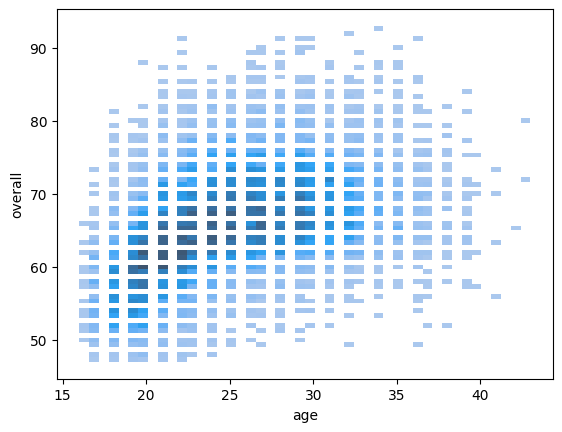

In [7]:
sns.histplot(x=fb_players['age'],y=fb_players['overall'])

<Axes: xlabel='age', ylabel='Count'>

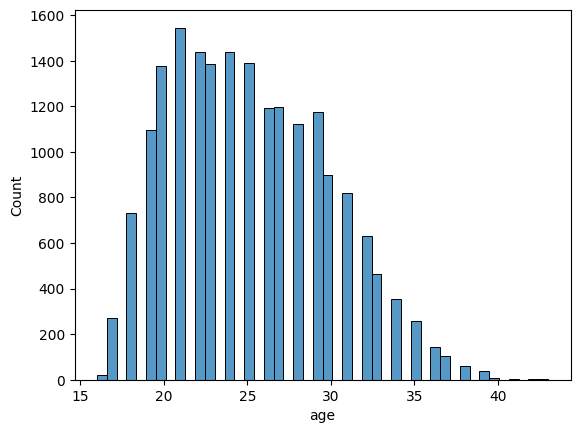

In [8]:
sns.histplot(fb_players['age'])

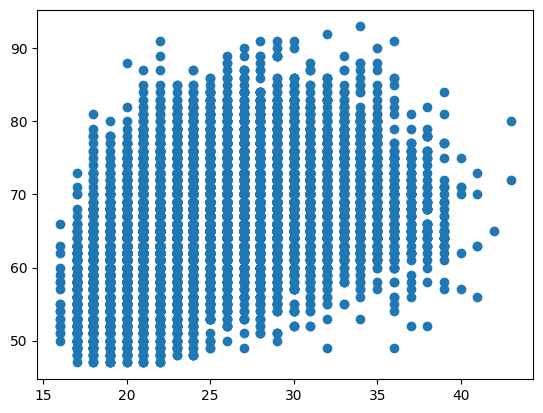

In [9]:
plt.scatter(fb_players['age'],fb_players['overall'])

In [10]:
fb_players=(fb_players-np.mean(fb_players,axis=0))/np.std(fb_players,axis=0)+4

In [11]:
fb_players.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.000000,4.000000,4.000000,4.000000,4.000000
std,1.000026,1.000026,1.000026,1.000026,1.000026
min,1.274268,0.372934,3.626788,3.562439,2.056003
25%,3.308376,3.329783,3.687995,3.588112,3.113669
50%,4.034843,3.986860,3.753668,3.690805,3.959802
75%,4.616017,4.643938,3.888297,3.947538,4.805934
max,7.957766,7.929325,29.106655,21.508066,7.767398


In [12]:
def random_centroid(data,c):
  df_centroid=[]
  for i in range(c):
    df_centroid.append(data.apply(lambda x:float(x.sample())))
  return pd.concat(df_centroid,axis=1)

In [13]:
centroids=random_centroid(fb_players,3)

In [14]:
centroids

,0,1,2
overall,5.197191,4.761310,4.034843
potential,5.629554,3.986860,3.986860
value_eur,3.914566,3.770086,3.720831
wage_eur,3.947538,3.690805,3.690805
age,6.921265,4.594401,5.440533


In [15]:
def find_label(data,centroid):
  labels=centroid.apply(lambda x:1/data.shape[0]*(np.sum(x-data,axis=1)**2))
  return labels.idxmin(axis=1)

In [16]:
def update_centroid(data,labels):
  centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
  return centroids

In [17]:
labels=find_label(fb_players,centroids)

In [18]:
update_centroid(fb_players,labels)

,0,1,2
overall,5.658651,3.433163,4.780612
potential,5.342080,3.541817,4.398192
value_eur,5.326558,3.735634,3.948985
wage_eur,5.534093,3.668231,4.091319
age,4.465962,3.653809,4.454271


In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [20]:
def plot_clusters(data,labels,centroids,iteration):
  pca=PCA(n_components=2)
  data2=pca.fit_transform(data)
  centroids2=pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f"Iteration:{iteration}")
  plt.scatter(x=data2[:,0],y=data2[:,1],c=labels)
  plt.scatter(x=centroids2[:,0],y=centroids2[:,1])
  plt.show()

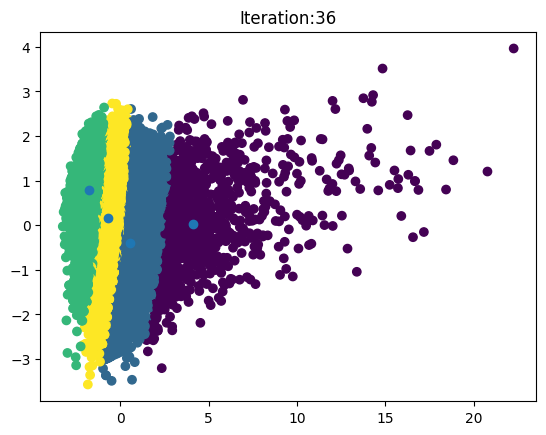

In [21]:
max_iter=100
iter=1
centroids=random_centroid(fb_players,4)
old_centroid=pd.DataFrame()
while iter<max_iter and not old_centroid.equals(centroids):
  old_centroid=centroids
  labels=find_label(fb_players,centroids)
  centroids=update_centroid(fb_players,labels)
  plot_clusters(fb_players, labels, centroids, iter)
  iter += 1

In [22]:
pd.concat([labels,fb_players],axis=1).rename(columns={0:'Labels'})['Labels'].sort_values()

0        0
874      0
871      0
869      0
867      0
        ..
13718    3
13717    3
13716    3
13746    3
9634     3
Name: Labels, Length: 19165, dtype: int64

In [23]:
def kmeans(k):
  max_iter=100
  iter=1
  centroids=random_centroid(fb_players,k)
  old_centroid=pd.DataFrame()
  labels=pd.DataFrame()
  while iter<max_iter and not old_centroid.equals(centroids):
    old_centroid=centroids
    labels=find_label(fb_players,centroids)
    centroids=update_centroid(fb_players,labels)
    iter += 1
  return labels

In [24]:
from sklearn.metrics import silhouette_score
y=[]
for i in range(2,5):
  labels=kmeans(i)
  y.append(silhouette_score(fb_players,labels))
y

[0.3197011264739435, 0.25202028831675377, 0.20489523570592466]